## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [ ]:
#artificial datasets, 10, available methods
#empirical datasets

#a new classifier, artificial data


In [4]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [2]:
noise = .2

dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


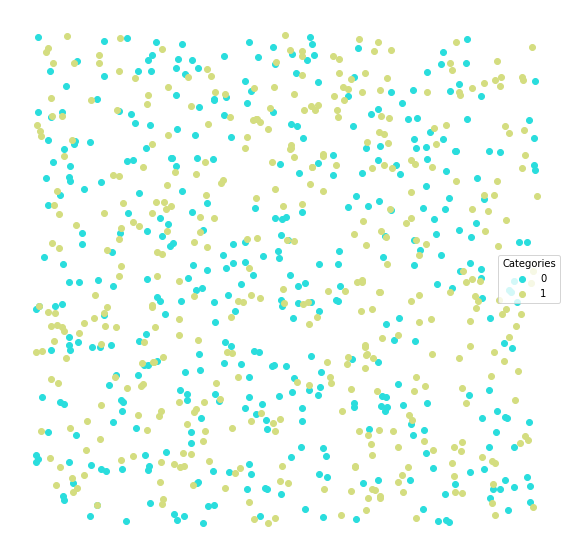

In [3]:
lucem_illud_2020.plotter(dfTrain)

In [22]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [23]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.5,0.501253,0.526316,0.525627,0.476190
1,0.5,0.501253,0.476190,0.475627,0.526316


In [32]:
pd0=lucem_illud_2020.evaluateClassifier(clf, dfTest)
pd0['methods']='naive bayes'
pd1=pandas.concat([pd0,pd1])

,Error_Rate,AUC,Precision,Average_Precision,Recall,methods
Category,,,,,,
0,0.50,0.501253,0.526316,0.525627,0.476190,naive bayes
1,0.50,0.501253,0.476190,0.475627,0.526316,naive bayes
0,0.47,0.529825,0.554455,0.540710,0.533333,decision tree
1,0.47,0.529825,0.505051,0.490816,0.526316,decision tree


In [ ]:
#random sample
#naive bayes: error-rate-0.50, AUC-0.50, Precision-0.52, Recall-0.47
##kNN: error_rate-0.46, AUC-0.54, Precision-0.57/0.51, Recall-0.50/0.57 ***
#svm: ER-0.5, AUC0.5, precisiton-0.52, recall-0.48
#svm-poly: ER-0.49, AUC-0.52, precision-0.59, recall-0.18
#logistic: ER-0.475, AUC-0.52, precision-0.55, recall-0.47
#decision tree: ER-0.47, AUC-0.52, Precision

#




## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [6]:
#open the file and read it by lines
text_file='amazon_alexa.txt'
with open(text_file, encoding='utf-8') as f:
    lines=f.readlines()

In [7]:
#construct lists to store the original data organized
txt_rating=[]
txt_date=[]
txt_variation=[]
txt_review=[]

#read each line (from the second line) in the txt and split items by tab
for line in lines[1:]:
    line_sp=line.split('\t')
    txt_rating.append(line_sp[0])
    txt_date.append(line_sp[1])
    txt_variation.append(line_sp[2])
    txt_review.append(line_sp[3])

In [8]:
txtDF=pandas.DataFrame({'rating':txt_rating,'data':txt_date,'variation':txt_variation,'reviews':txt_review})
txtDF

,rating,data,variation,reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!
1,5,31-Jul-18,Charcoal Fabric,Loved it!
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe..."
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4..."
4,5,31-Jul-18,Charcoal Fabric,Music
...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw..."
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec..."
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m..."
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali..."


In [5]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

In [35]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

In [19]:
txtDF['category']=['Negative']*len(txtDF['rating'])

In [26]:
for i,s in enumerate(txtDF['rating']):
    if float(s)>2.5:
        txtDF['category'][i]='Positive'
txtDF

,rating,data,variation,reviews,category
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,Positive
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",Positive
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",Positive
4,5,31-Jul-18,Charcoal Fabric,Music,Positive
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"""Perfect for kids, adults and everyone in betw...",Positive
3146,5,30-Jul-18,Black Dot,"""Listening to music, searching locations, chec...",Positive
3147,5,30-Jul-18,Black Dot,"""I do love these things, i have them running m...",Positive
3148,5,30-Jul-18,White Dot,"""Only complaint I have is that the sound quali...",Positive


In [39]:
#tokenize and normalize
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [27]:
txtDF['tokenized_text']=txtDF['reviews'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
txtDF['normalized_text']=txtDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [29]:
#training set and test set
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(txtDF, holdBackFraction=holdBackFraction)

In [30]:
print(len(train_data_df))
print(len(test_data_df))

2520
630


In [31]:
#TF-IDF
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['reviews'])

In [32]:
TFVects.shape

(2520, 1898)

In [33]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [34]:
#PCA
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))
train_data_df['pca'] = [r for r in reduced_data]

In [35]:
train_data_df.head()

,rating,data,variation,reviews,category,tokenized_text,normalized_text,vect,pca
1018,5,29-Jul-18,Heather Gray Fabric,Great,Positive,[Great],[great],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.004134194577229014, -0.005400400883530416,..."
24,3,30-Jul-18,Sandstone Fabric,"""I got a second unit for the bedroom, I was ex...",Positive,"[I, got, a, second, unit, for, the, bedroom, I...","[get, second, unit, bedroom, expect, sound, im...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.28963419...","[-0.008212249206087974, -0.02288150632148932, ..."
1211,5,28-Jul-18,Black Spot,no problem,Positive,"[no, problem]",[problem],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.00849710126007379, -0.010095724669912457, ..."
872,5,30-Jul-18,Oak Finish,Entertainment,Positive,[Entertainment],[entertainment],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.014426565660640782, -0.005509542637920792, ..."
582,4,10-Jun-18,Black,I bought it mainly to be a speaker when playin...,Positive,"[I, bought, it, mainly, to, be, a, speaker, wh...","[buy, mainly, speaker, play, music, video, pho...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01897375451009461, 0.011165131010410237, -..."


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


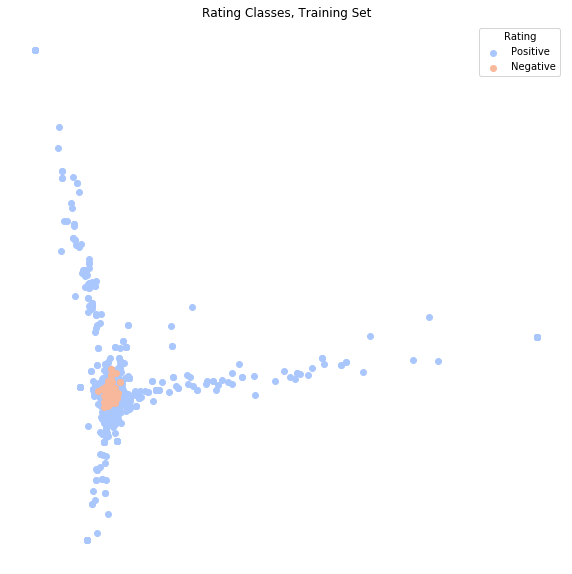

In [36]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot positive rating
a = np.stack(train_data_df[train_data_df['category'].eq('Positive')]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Positive")

#Plot negative rating
a = np.stack(train_data_df[train_data_df['category'].eq('Negative')]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Negative")
    
ax.legend(loc = 'upper right', title = 'Rating')
plt.title('Rating Classes, Training Set')
plt.show()

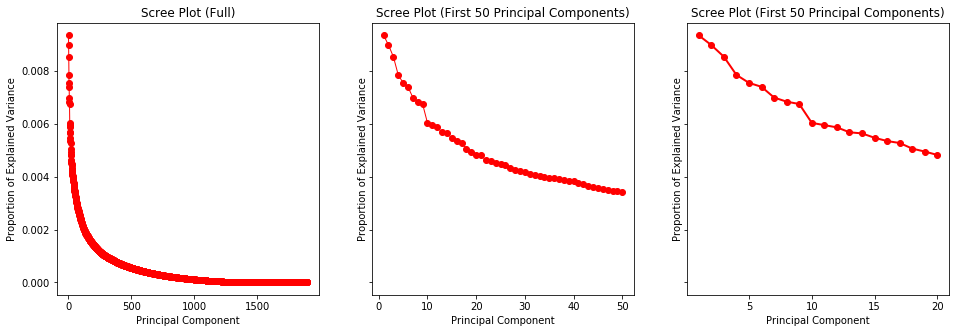

In [39]:
n = min(TFVects.shape[0],TFVects.shape[1])

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [78]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [135]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [136]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.9257936507936508

In [123]:
def calculate_score(model,data_feature,data_category,method_des):
    precision_score=[]
    recall_score=[]
    f1_score=[]
    method=[]
    AUC=[]
    predictions = model.predict(np.stack(data_feature, axis=0))
    preds = [True if (c == 'Positive') else False for c in predictions]
    acts = [True if (c == 'Positive') else False for c in data_category]
    precision_score.append(sklearn.metrics.precision_score(acts, preds))
    recall_score.append(sklearn.metrics.recall_score(acts, preds))
    f1_score.append(sklearn.metrics.f1_score(acts, preds))
    AUC.append(sklearn.metrics.roc_auc_score(acts, preds))
    method.append(method_des)
    
    preds = [True if (c == 'Negative') else False for c in predictions]
    acts = [True if (c == 'Negative') else False for c in data_category]
    precision_score.append(sklearn.metrics.precision_score(acts, preds))
    recall_score.append(sklearn.metrics.recall_score(acts, preds))
    f1_score.append(sklearn.metrics.f1_score(acts, preds))
    AUC.append(sklearn.metrics.roc_auc_score(acts, preds))
    method.append(method_des)
    classes=['Positive','Negative']
    pd_calculate=pandas.DataFrame({'Precision':precision_score,'Recall':recall_score,'F1':f1_score, 'AUC':AUC, 'Methods':method},index=classes)
    pd_calculate.index.rename('Category', inplace=True)
    return pd_calculate

In [119]:
#plot confusion matrix
def confusion_matrix(model,data_feature,data_category,method_des):
    predictions =model.predict(np.stack(data_feature, axis=0))
    mat = sklearn.metrics.confusion_matrix(predictions, data_category)
    seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                        xticklabels=data_category.unique(), yticklabels=data_category.unique())
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.title("Confusion Matrix")
    plt.show()
    plt.close()

In [121]:
def plot_ROC_curve(model,data_feature,data_category,method_des):
    clf=model
    classes = clf.classes_
    try:
        probs = clf.predict_proba(np.stack(data_feature, axis=0))
    except AttributeError:
        print("The {} classifier does not apear to support prediction probabilties, so an ROC curve can't be created. You can try adding `probability = True` to the model specification or use a different model.".format(type(clf)))
        return
    predictions = clf.predict(np.stack(data_feature, axis=0))

    #setup axis for plotting
    fig, ax = plt.subplots(figsize = (10,10))

    #We can return the AUC values, in case they are useful
    aucVals = []
    for classIndex, className in enumerate(classes):        #Setup binary classes
        truths = [1 if c == className else 0 for c in data_category]
        predict = [1 if c == className else 0 for c in predictions]
        scores = probs[:, classIndex]

        #Get the ROC curve
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(truths, scores)
        auc = sklearn.metrics.auc(fpr, tpr)
        aucVals.append(auc)

        #Plot the class's line
        ax.plot(fpr, tpr, label = "{} (AUC ${:.3f}$)".format(str(className).split(':')[0], auc))

    #Make the plot nice, then display it
    ax.set_title('Receiver Operating Characteristics')
    plt.plot([0,1], [0,1], color = 'k', linestyle='--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = 'lower right')
    plt.show()
    plt.close()

In [137]:
#train_evaluation
pd_alexa_train_lg=calculate_score(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')
pd_alexa_train_lg

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.925794,1.0,0.961467,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


In [138]:
pd_alexa_train=pd_alexa_train_lg

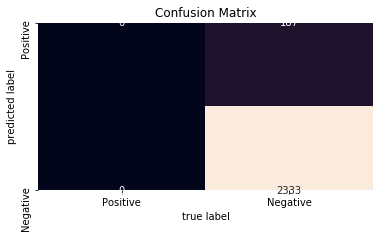

In [120]:
confusion_matrix(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')

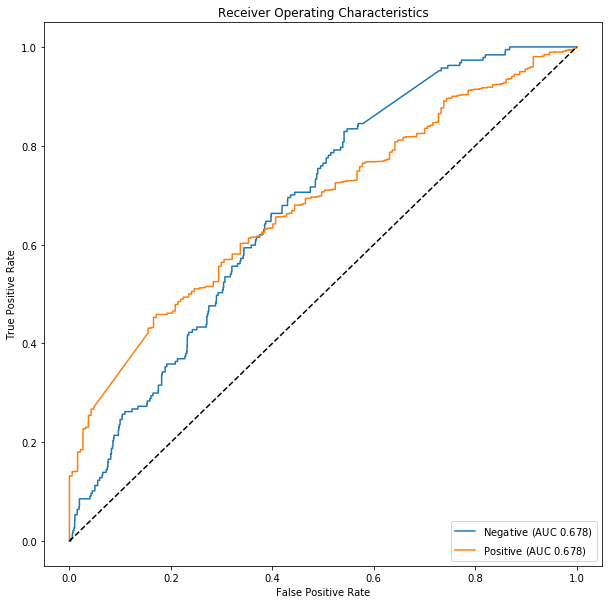

In [122]:
plot_ROC_curve(logistic,train_data_df['pca_reduced_10'], train_data_df['category'],'Logistic_PCA10')

In [81]:
#Try with the test
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['reviews'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.8888888888888888

In [139]:
#test_evaluation
pd_alexa_test_lg=calculate_score(logistic,test_data_df['pca_reduced_10'], test_data_df['category'],'Logistic_PCA10')
pd_alexa_test_lg

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


In [140]:
pd_alexa_test=pd_alexa_test_lg

In [110]:
#old version
preds = [True if (c == 'Positive') else False for c in test_data_df['lg_predict']]
acts = [True if (c == 'Positive') else False for c in test_data_df['category']]
precision_score.append(sklearn.metrics.precision_score(acts, preds))
recall_score.append(sklearn.metrics.recall_score(acts, preds))
f1_score.append(sklearn.metrics.f1_score(acts, preds))
AUC.append(sklearn.metrics.roc_auc_score(acts, preds))
method.append('Logistic Regression')

In [111]:
#old version
pd_alexa=pandas.DataFrame({'Precision':precision_score,'Recall':recall_score,'F1':f1_score, 'AUC':AUC, 'Methods':method})
pd_alexa

,Precision,Recall,F1,AUC,Methods
0,0.888889,1.0,0.941176,0.5,Logistic Regression


In [141]:
train_data_df['pca_reduced_2'] = train_data_df['pca'].apply(lambda x: x[:2])
test_data_df['pca_reduced_2'] = test_data_df['pca'].apply(lambda x: x[:2])

logistic.fit(np.stack(train_data_df['pca_reduced_2'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_2'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_2'], axis=0), test_data_df['category']))

Training:
0.9257936507936508
Testing:
0.8888888888888888


In [142]:
pd_alexa_train_lgp2=calculate_score(logistic,train_data_df['pca_reduced_2'], train_data_df['category'],'Logistic_PCA2')
pd_alexa_train_lgp2

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.925794,1.0,0.961467,0.5,Logistic_PCA2
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA2


In [128]:
#L1
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9261904761904762


In [129]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8888888888888888


In [143]:
pd_alexa_train_lgl1=calculate_score(logistic_l1,train_data_df['vect'], train_data_df['category'],'Logistic_L1')
pd_alexa_train_lgl1

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.926161,1.000000,0.961665,0.502674,Logistic_L1
Negative,1.000000,0.005348,0.010638,0.502674,Logistic_L1


In [144]:
pd_alexa_test_lgl1=calculate_score(logistic_l1,test_data_df['vect'], test_data_df['category'],'Logistic_L1')
pd_alexa_test_lgl1

C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zhuangchu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_L1
Negative,0.000000,0.0,0.000000,0.5,Logistic_L1


In [148]:
pd_alexa_train=pandas.concat([pd_alexa_train_lgl1,pd_alexa_train])
pd_alexa_train

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.926161,1.000000,0.961665,0.502674,Logistic_L1
Negative,1.000000,0.005348,0.010638,0.502674,Logistic_L1
Positive,0.925794,1.000000,0.961467,0.500000,Logistic_PCA10
Negative,0.000000,0.000000,0.000000,0.500000,Logistic_PCA10


In [149]:
pd_alexa_test=pandas.concat([pd_alexa_test_lgl1,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.888889,1.0,0.941176,0.5,Logistic_L1
Negative,0.000000,0.0,0.000000,0.5,Logistic_L1
Positive,0.888889,1.0,0.941176,0.5,Logistic_PCA10
Negative,0.000000,0.0,0.000000,0.5,Logistic_PCA10


In [47]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [48]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9075396825396825
Testing:
0.8809523809523809


In [151]:
pd_alexa_train_nb=calculate_score(naiveBayes,train_data_df['vect'], train_data_df['category'],'Naive Bayes')
pd_alexa_train_nb

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.950257,0.949850,0.950054,0.664765,Naive Bayes
Negative,0.377660,0.379679,0.378667,0.664765,Naive Bayes


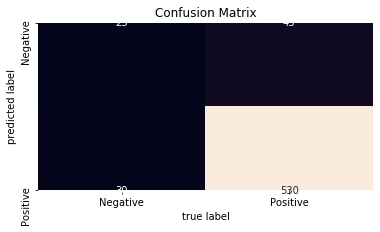

In [161]:
confusion_matrix(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

In [49]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [154]:
pd_alexa_test_nb=calculate_score(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')
pd_alexa_test_nb

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes


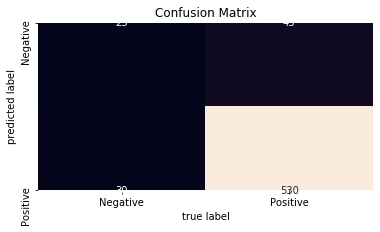

In [159]:
confusion_matrix(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

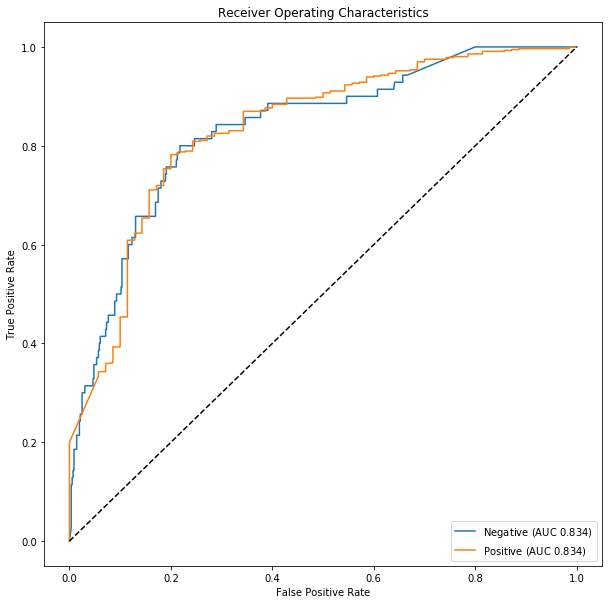

In [160]:
plot_ROC_curve(naiveBayes,test_data_df['vect'], test_data_df['category'],'Naive Bayes')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


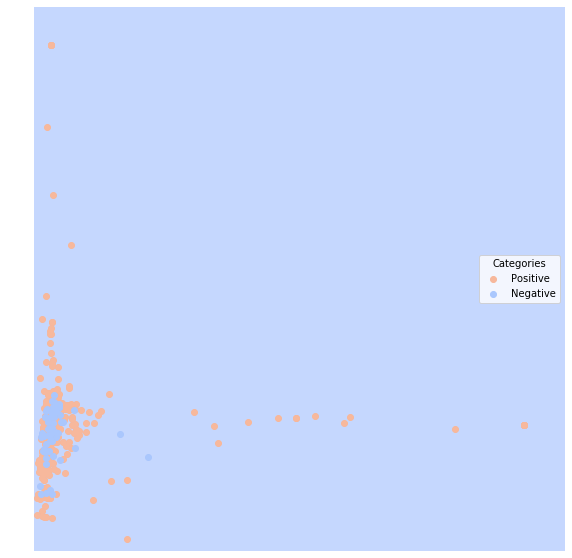

In [158]:
lucem_illud_2020.plotregions(naiveBayes, test_data_df)

In [157]:
pd_alexa_train=pandas.concat([pd_alexa_train_nb,pd_alexa_train])
pd_alexa_test=pandas.concat([pd_alexa_test_nb,pd_alexa_test])
pd_alexa_test

,Precision,Recall,F1,AUC,Methods
Category,,,,,
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.921739,0.946429,0.933921,0.651786,Naive Bayes
Negative,0.454545,0.357143,0.400000,0.651786,Naive Bayes
Positive,0.888889,1.000000,0.941176,0.500000,Logistic_L1
Negative,0.000000,0.000000,0.000000,0.500000,Logistic_L1
Positive,0.888889,1.000000,0.941176,0.500000,Logistic_PCA10


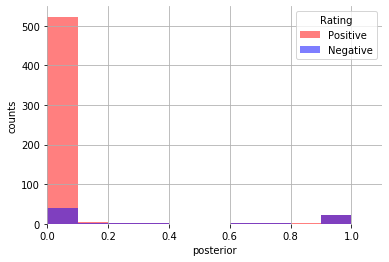

In [69]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq("Positive")]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'Positive', color = 'red')
test_data_df[test_data_df['category'].eq("Negative")]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'Negative', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Rating")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()